# Titanic - Machine Learning from Disaster

Use the Titanic date set from Kaggle to try to predict the classification of survival/deceased of Titanic passengers based on the given features.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

## Missing Data

Create a heatmap to visualize where we are missing data

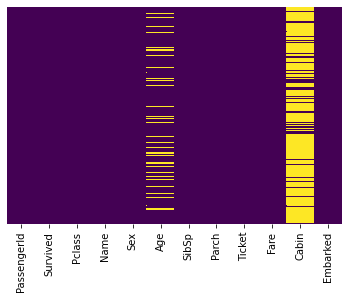

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

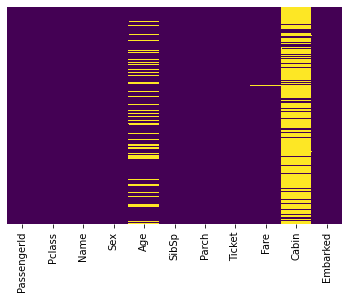

In [8]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
miss_age_pc = train['Age'].isnull().mean() # % of Age column with missing values
miss_cabin_pc = train['Cabin'].isnull().mean() # % of Cabin column with missing values
print(miss_age_pc)
print(miss_cabin_pc)

0.19865319865319866
0.7710437710437711


There are nearly 20% of Age data missing, which is likely small enough for some reasonable replacements with some form of imputation. 

For the Cabin column, the portion of missing data is almost 80%, too high to use for deriving insights. Can either drop directly or replace it with a feature like "Cabin Known: 0 or 1"

## Data Visualization

[Text(0.5, 1.0, '# Survived vs Deceased')]

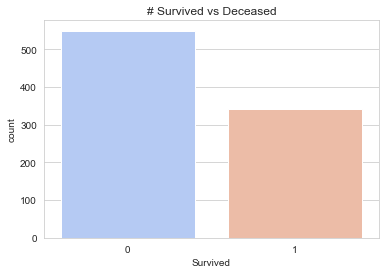

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='coolwarm').set(title='# Survived vs Deceased')

[Text(0.5, 1.0, '# Survived/Deceased by Sex')]

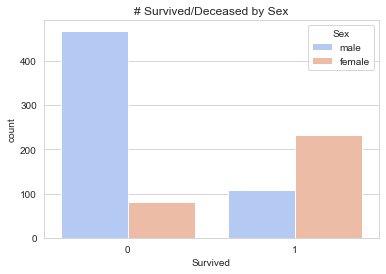

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train,palette='coolwarm').set(title='# Survived/Deceased by Sex')

[Text(0.5, 1.0, '# Survived/Deceased by Class')]

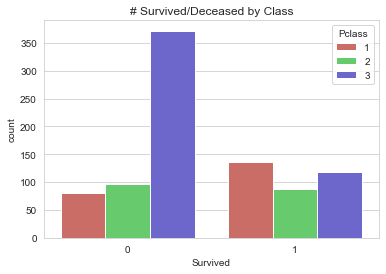

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=train,palette='hls').set(title='# Survived/Deceased by Class')

[Text(0.5, 1.0, 'Age Distribution (exclude NA)')]

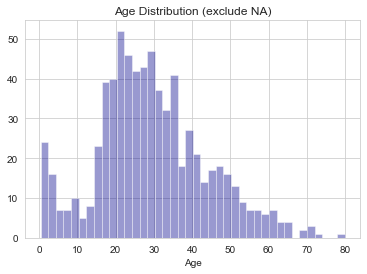

In [13]:
sns.distplot(train['Age'].dropna(), bins=40, kde=False, color='darkblue').set(title='Age Distribution (exclude NA)')

[Text(0.5, 1.0, '# Passengers by # of Sibling(s)/Spouse')]

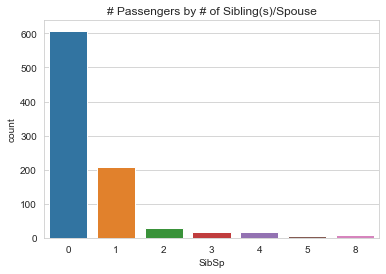

In [14]:
sns.countplot(x='SibSp', data=train).set(title='# Passengers by # of Sibling(s)/Spouse')

[Text(0.5, 1.0, '# Passengers by Parch')]

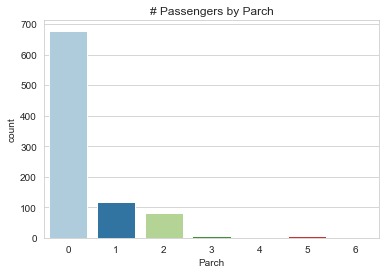

In [15]:
sns.countplot(x='Parch', data=train, palette='Paired').set(title='# Passengers by Parch')

[Text(0.5, 1.0, 'Distribution of Fare Price')]

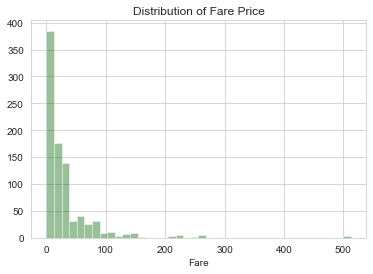

In [16]:
sns.distplot(train['Fare'], bins=40, color='darkgreen', kde=False).set(title='Distribution of Fare Price')

It seems that all fare price fall into 0 to 300 bucket, except one outlier excedding 500, which is most likely entry by mistake?

## Data Cleaning

For the nearly 20% missing age data, we can explore ways to fill in based off other features(by Parch/Class) instead of simple imputation by mean of all age or dropping NA.

[Text(0.5, 1.0, 'Age by Class')]

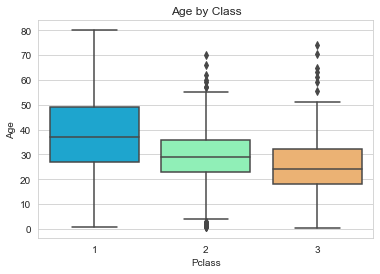

In [17]:
sns.boxplot(x='Pclass', y='Age', data=train, palette='rainbow').set(title='Age by Class')

[Text(0.5, 1.0, 'Age by Parch')]

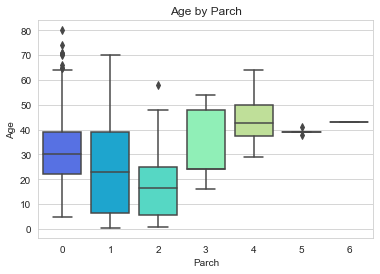

In [18]:
sns.boxplot(x='Parch', y='Age', data=train, palette='rainbow').set(title='Age by Parch')

Passengers in higher classes (wealthier) tend to be elder, which makes more sense that the plot result of age vs parch, so we can use the average age per class for imputation of age.

Create a function for imputation:

In [19]:
def age_impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
train['Age'] = train[['Age','Pclass']].apply(age_impute,axis=1)
test['Age'] = test[['Age','Pclass']].apply(age_impute,axis=1)

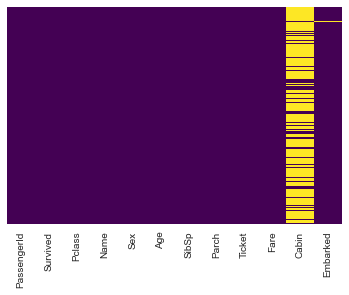

In [21]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

For the missing Fare row in the test data set, we take a look at Fare vs Class to decide how to impute the missing value

[Text(0.5, 1.0, 'Fare by Class')]

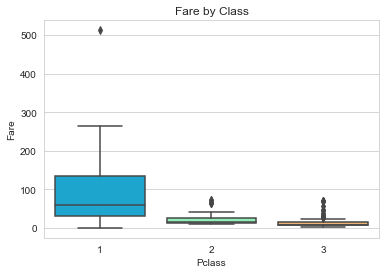

In [22]:
sns.boxplot(x='Pclass', y='Fare', data=test, palette='rainbow').set(title='Fare by Class')

In [23]:
test['Fare'].loc[test['Fare'].isna()]

152   NaN
Name: Fare, dtype: float64

In [24]:
test['Fare'].loc[test['Fare'].isna()]=test['Fare'].loc[(test['Pclass']==3) & (test['Fare'].notna())].mean()

C:\Users\Qing\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Drop the column "Cabin" and the missing row of "Embarked":

In [25]:
train.drop('Cabin', axis=1, inplace=True)
train.dropna(inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


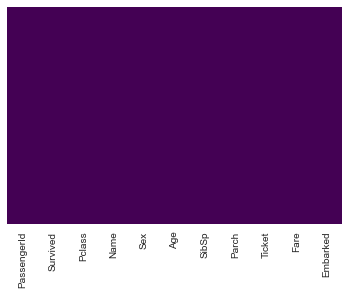

In [27]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

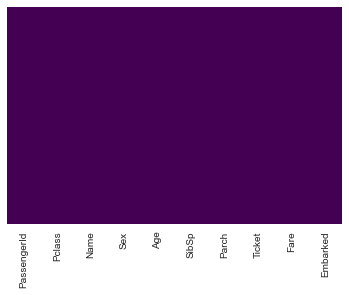

In [28]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [29]:
new_ticket = train['Ticket'].str.split(' ', n=1, expand=True)
new_ticket_test = test['Ticket'].str.split(' ', n=1, expand=True)

In [30]:
train['ticket_front'] = new_ticket[0]
train['ticket_num'] = new_ticket[1]
test['ticket_front'] = new_ticket_test[0]
test['ticket_num'] = new_ticket_test[1]

In [31]:
train['ticket_num'].loc[train['ticket_num'].isna()] = train['ticket_front']
train['ticket_front'].loc[train['ticket_front'] == train['ticket_num']] = ''
test['ticket_num'].loc[test['ticket_num'].isna()] = test['ticket_front']
test['ticket_front'].loc[test['ticket_front'] == test['ticket_num']] = ''

C:\Users\Qing\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
# train.drop('ticket_num', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ticket_front,ticket_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,A/5,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,PC,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,STON/O2.,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,,373450


In [33]:
train['ticket_front'].value_counts()

              663
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
CA              6
STON/O2.        6
F.C.C.          5
C               5
SC/PARIS        5
S.O.C.          5
SC/Paris        4
S.O./P.P.       3
A/4             3
PP              3
SC/AH           3
A/4.            3
A./5.           2
A.5.            2
P/PP            2
S.C./PARIS      2
WE/P            2
SOTON/O2        2
Fa              1
A/S             1
S.W./PP         1
SW/PP           1
C.A./SOTON      1
SCO/W           1
W.E.P.          1
S.P.            1
S.C./A.4.       1
SC              1
F.C.            1
S.O.P.          1
A4.             1
SO/C            1
W/C             1
Name: ticket_front, dtype: int64

In [34]:
train['ticket_front'] = train['ticket_front'].str.replace('.','')
test['ticket_front'] = test['ticket_front'].str.replace('.','')
train['ticket_front'].value_counts()

            663
PC           60
CA           41
A/5          19
SOTON/OQ     15
STON/O       12
W/C          10
SC/PARIS      7
STON/O2       6
A/4           6
C             5
SOC           5
FCC           5
SC/Paris      4
PP            3
SC/AH         3
SO/PP         3
SOTON/O2      2
SW/PP         2
P/PP          2
A5            2
WE/P          2
SC            1
A4            1
SOP           1
SO/C          1
FC            1
SC/A4         1
SP            1
WEP           1
SCO/W         1
A/S           1
Fa            1
CA/SOTON      1
Name: ticket_front, dtype: int64

In [35]:
train['ticket_front'].loc[train['ticket_front'] == 'A/5'] = 'A5'
train['ticket_front'].loc[train['ticket_front'] == 'A/4'] = 'A4'
test['ticket_front'].loc[test['ticket_front'] == 'A/5'] = 'A5'
test['ticket_front'].loc[test['ticket_front'] == 'A/4'] = 'A4'

C:\Users\Qing\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
new_ticket_front = train['ticket_front'].str.split('/', n=1, expand=True)
train['ticket_pre'] = new_ticket_front[0]
new_ticket_front_test = test['ticket_front'].str.split('/', n=1, expand=True)
test['ticket_pre'] = new_ticket_front_test[0]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ticket_front,ticket_num,ticket_pre
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,A5,21171,A5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,PC,17599,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,STON/O2,3101282,STON
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,,113803,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,,373450,


In [37]:
train['Title'] = train['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
test['Title'] = test['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ticket_front,ticket_num,ticket_pre,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,A5,21171,A5,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,PC,17599,PC,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,STON/O2,3101282,STON,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,,113803,,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,,373450,,Mr


# Converting Categorical Features

Moving forward, we will use selected features for the classification model and will need to convert these categorical features to dummy variables. 

Features to be used：

PassengerId, Pclass, Sex (dummy), Age, SibSp, Parch, Fare, Embarked (dummy), ticket_pre (dummy), Title (dummy)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    int64  
 1   Survived      889 non-null    int64  
 2   Pclass        889 non-null    int64  
 3   Name          889 non-null    object 
 4   Sex           889 non-null    object 
 5   Age           889 non-null    float64
 6   SibSp         889 non-null    int64  
 7   Parch         889 non-null    int64  
 8   Ticket        889 non-null    object 
 9   Fare          889 non-null    float64
 10  Embarked      889 non-null    object 
 11  ticket_front  889 non-null    object 
 12  ticket_num    889 non-null    object 
 13  ticket_pre    889 non-null    object 
 14  Title         889 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 151.1+ KB


In [40]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
ticket_prefix = pd.get_dummies(train['ticket_pre'], drop_first=True)
title = pd.get_dummies(train['Title'], drop_first=True)

sex_test = pd.get_dummies(test['Sex'], drop_first=True)
embark_test = pd.get_dummies(test['Embarked'], drop_first=True)
ticket_prefix_test = pd.get_dummies(test['ticket_pre'], drop_first=True)
title_test = pd.get_dummies(test['Title'], drop_first=True)

train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'ticket_front', 'ticket_num', 'ticket_pre', 'Title'], axis=1, inplace=True)
test.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'ticket_front', 'ticket_num', 'ticket_pre', 'Title'], axis=1, inplace=True)

In [41]:
train = pd.concat([train, sex, embark, ticket_prefix, title], axis=1)
test = pd.concat([test, sex_test, embark_test, ticket_prefix_test, title_test], axis=1)

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,3,22.0,1,0,7.2500,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [42]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,A,...,W,WEP,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
0,892,3,34.5,0,0,7.8292,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,894,2,62.0,0,0,9.6875,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,896,3,22.0,1,1,12.2875,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Build a Logistic Regression Model

In [43]:
y_train = train['Survived']

X_train = train.drop('Survived', axis=1)
X_test = test

In [44]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    int64  
 1   Pclass        889 non-null    int64  
 2   Age           889 non-null    float64
 3   SibSp         889 non-null    int64  
 4   Parch         889 non-null    int64  
 5   Fare          889 non-null    float64
 6   male          889 non-null    uint8  
 7   Q             889 non-null    uint8  
 8   S             889 non-null    uint8  
 9   A             889 non-null    uint8  
 10  A4            889 non-null    uint8  
 11  A5            889 non-null    uint8  
 12  C             889 non-null    uint8  
 13  CA            889 non-null    uint8  
 14  FC            889 non-null    uint8  
 15  FCC           889 non-null    uint8  
 16  Fa            889 non-null    uint8  
 17  P             889 non-null    uint8  
 18  PC            889 non-null    

The test data set has less features than the train data set (34 vs 47), so we will add the missing columns in the test data set with default values to 0

In [45]:
missing_cols = set(X_train.columns) - set(X_test.columns)

for c in missing_cols:
    X_test[c] = 0
X_test = X_test[X_train.columns]

## Training and Predicting

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [48]:
predictions = logmodel.predict(X_test)

# Create csv for Submission

In [49]:
submission = pd.DataFrame({'PassengerId':X_test['PassengerId'], 'Survived':predictions})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [51]:
submission.to_csv('Titanic_Log_pred.csv', index=False)

In [52]:
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1
